In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
sns.set()
import matplotlib.pyplot as plt

In [49]:
health_data=pd.read_csv('C:/project/ML/dataset/health_data.csv')

In [50]:
type(health_data)

pandas.core.frame.DataFrame

In [51]:
health_data.shape


(1259, 27)

In [52]:
health_data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

<AxesSubplot:>

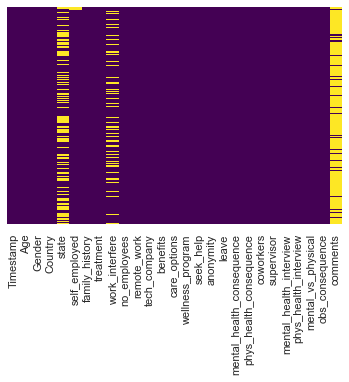

In [53]:
sns.heatmap(health_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

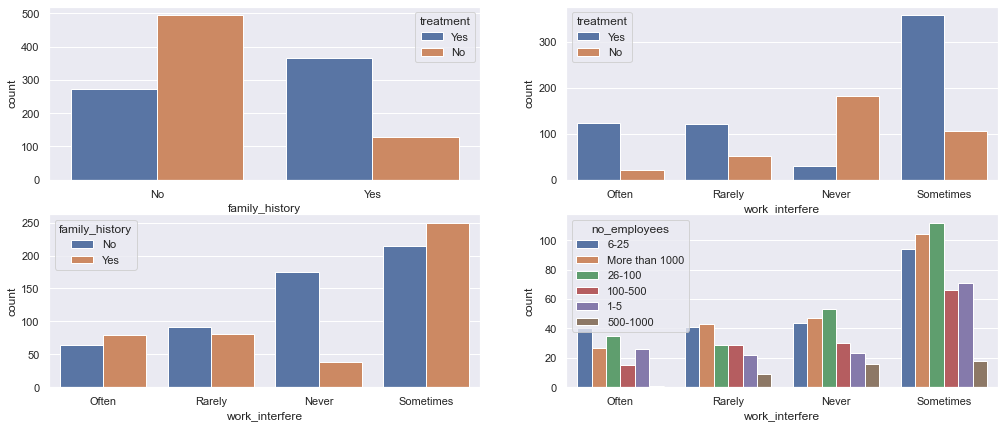

In [54]:
plt.figure(figsize=(17,7))
plt.subplot(2,2,1)
sns.countplot(x='family_history', hue='treatment',data=health_data)

plt.subplot(2,2,2)
sns.countplot(x='work_interfere', hue='treatment',data=health_data)

plt.subplot(2,2,3)
sns.countplot(x='work_interfere', hue='family_history',data=health_data)

plt.subplot(2,2,4)
sns.countplot(x='work_interfere', hue='no_employees',data=health_data)

<AxesSubplot:xlabel='work_interfere', ylabel='count'>

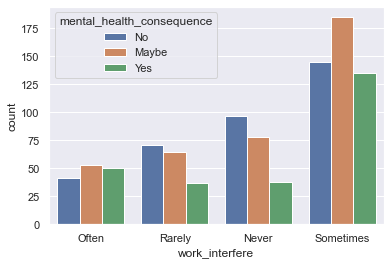

In [55]:
sns.countplot(x='work_interfere', hue='mental_health_consequence',data=health_data)

In [56]:
health_data.drop('state',axis=1,inplace=True)

In [57]:
health_data.drop('comments',axis=1,inplace=True)

In [58]:
health_data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


<AxesSubplot:>

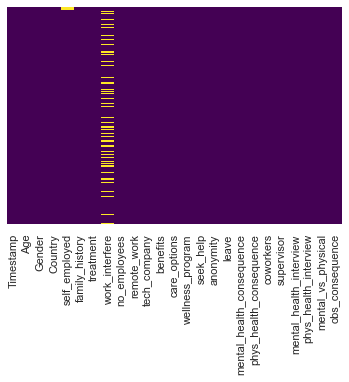

In [59]:
sns.heatmap(health_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
health_data.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [61]:
health_data.self_employed.fillna(value='No',inplace=True)

In [62]:
health_data.isnull().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [63]:
def impute_work_interfere(cols):
    work_interfere=cols[0]
    Country=cols[1]
    
    if pd.isnull(work_interfere):
        if Country=='United States':
            return 'Sometimes'
        elif Country=='United Kingdom':
            return 'Sometimes'
        elif Country=='Germany' or Country == 'France':
            return 'Rarely'
        elif Country == 'Canada':
            return 'Never'
        else:
            return 'rarely'
    else:
        return work_interfere
            
    

In [64]:
health_data['work_interfere']=health_data[['work_interfere','Country']].apply(impute_work_interfere,axis=1)

In [65]:
health_data.head()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [66]:
health_data.tail()

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,Sometimes,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No
1258,2016-02-01 23:04:31,25,Male,United States,No,Yes,Yes,Sometimes,26-100,No,...,Yes,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No


<AxesSubplot:>

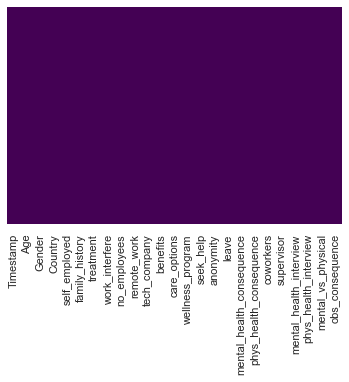

In [67]:
sns.heatmap(health_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [68]:
health_data.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [69]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [70]:
health_data

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,M,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,f,United States,No,No,No,Sometimes,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [92]:
 for col in health_data.columns:
        print(col, ':', len(health_data[col].unique()), 'labels')

Timestamp : 1246 labels
Age : 53 labels
Gender : 49 labels
Country : 48 labels
state : 46 labels
self_employed : 3 labels
family_history : 2 labels
treatment : 2 labels
work_interfere : 5 labels
no_employees : 6 labels
remote_work : 2 labels
tech_company : 2 labels
benefits : 3 labels
care_options : 3 labels
wellness_program : 3 labels
seek_help : 3 labels
anonymity : 3 labels
leave : 5 labels
mental_health_consequence : 3 labels
phys_health_consequence : 3 labels
coworkers : 3 labels
supervisor : 3 labels
mental_health_interview : 3 labels
phys_health_interview : 3 labels
mental_vs_physical : 3 labels
obs_consequence : 2 labels
comments : 161 labels


In [93]:
health_data.Timestamp.value_counts().sort_values(ascending=False).head(20)

2014-08-27 12:44:51    2
2014-08-27 12:37:50    2
2014-08-27 14:22:43    2
2014-08-27 12:43:28    2
2014-08-28 16:58:33    2
2014-08-28 09:59:39    2
2014-08-27 15:23:51    2
2014-08-27 15:24:47    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
2014-08-27 17:33:52    2
2014-08-28 16:52:34    2
2014-08-27 12:31:41    2
2014-08-27 11:32:43    1
2014-08-27 11:29:44    1
2014-08-27 11:29:46    1
2014-08-27 11:30:22    1
2014-08-27 11:31:22    1
2014-08-27 11:31:50    1
2014-08-27 11:32:05    1
Name: Timestamp, dtype: int64

In [112]:
top_x=[rec_val for rec_val in health_data.Timestamp.value_counts().sort_values(ascending=False).head(10).index]

In [116]:
for label in top_x:
    print
    health_data[label]=np.where(health_data[col]==label,1,0)
    
health_data[['Timestamp']+top_x].head(40)

,Timestamp,2014-08-27 12:44:51,2014-08-27 12:37:50,2014-08-27 14:22:43,2014-08-27 12:43:28,2014-08-28 16:58:33,2014-08-28 09:59:39,2014-08-27 15:23:51,2014-08-27 15:24:47,2014-08-27 15:55:07,2014-08-27 12:54:11
0,2014-08-27 11:29:31,0,0,0,0,0,0,0,0,0,0
1,2014-08-27 11:29:37,0,0,0,0,0,0,0,0,0,0
2,2014-08-27 11:29:44,0,0,0,0,0,0,0,0,0,0
3,2014-08-27 11:29:46,0,0,0,0,0,0,0,0,0,0
4,2014-08-27 11:30:22,0,0,0,0,0,0,0,0,0,0
5,2014-08-27 11:31:22,0,0,0,0,0,0,0,0,0,0
6,2014-08-27 11:31:50,0,0,0,0,0,0,0,0,0,0
7,2014-08-27 11:32:05,0,0,0,0,0,0,0,0,0,0
8,2014-08-27 11:32:39,0,0,0,0,0,0,0,0,0,0
9,2014-08-27 11:32:43,0,0,0,0,0,0,0,0,0,0


In [120]:
#get whole set of dummy variables for all categorical variables

#function to create the dummy variables for the most frequent lables
#the number of most frequent dummy variables can be varied
def one_hot_top_encoding_for_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(health_data[variable]==label,1,0)
        
health_data=pd.read_csv('C:/project/ML/dataset/health_data.csv')

one_hot_top_encoding_for_top_x(health_data,'Timestamp',top_x)


In [103]:
for col in health_data.columns:
    print('column:',col)

column: Timestamp
column: Age
column: Gender
column: Country
column: state
column: self_employed
column: family_history
column: treatment
column: work_interfere
column: no_employees
column: remote_work
column: tech_company
column: benefits
column: care_options
column: wellness_program
column: seek_help
column: anonymity
column: leave
column: mental_health_consequence
column: phys_health_consequence
column: coworkers
column: supervisor
column: mental_health_interview
column: phys_health_interview
column: mental_vs_physical
column: obs_consequence
column: comments


In [105]:
res=top_x_cols('Timestamp',10)
one_hot_top_encoding_for_top_x(health_data,col,res)

AttributeError: 'DataFrame' object has no attribute 'col'